In [2]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from conn_dict import conn_dict
import psycopg2
from sqlalchemy import create_engine, inspect
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix, mean_absolute_error

In [3]:
# create variables from conn_dict
locals().update(conn_dict)


In [4]:
# create the connection to the database 
engine = create_engine(f'postgresql://{username}:{db_pass}@{hostname}:{port_id}/{db}')




In [5]:
# look at the tables in the database
inspector = inspect(engine)
inspector.get_table_names()


['Additional_Health_Measures_2',
 'Health_Measures_3_State',
 'Additional_Health_Measures_4_State',
 'health_measures',
 'additional_health_measures',
 'all_health_measures_final',
 'Health_Measures_1']

In [6]:
health_measures_df = pd.read_sql('SELECT * FROM public."all_health_measures_final"', engine)
health_measures_df.head()

,State,County,State_County,Premature_death,Percentage_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percentage_Low_birthweight,Percentage_Smokers,Percentage_Adults_with_Obesity,...,Suicides,Firearm_fatalities,Juvenile_Arrest_Rate,Traffic_Volume,Homeowners,Severe_housing_cost_burden,percentage_Broadband_Access,Population,percentage_female,rural_residents
0,Alabama,Autauga,Alabama_Autauga,836,20,4.5,5.4,10,20,35,...,52,49,8,155,16088,2862,83,56145,51.5,22921
1,Alabama,Baldwin,Alabama_Baldwin,3377,17,4.2,5.2,8,20,30,...,214,153,26,134,64716,9296,85,229287,51.6,77060
2,Alabama,Barbour,Alabama_Barbour,539,31,5.9,6.1,12,28,40,...,20,32,24,102,5775,1055,65,24589,47.2,18613
3,Alabama,Bibb,Alabama_Bibb,460,25,5.2,5.8,10,25,41,...,18,20,24.62576375,27,5428,650,76,22136,46.8,15663
4,Alabama,Blount,Alabama_Blount,1143,23,4.9,5.7,8,22,39,...,61,59,6,43,16132,1722,80,57879,50.6,51562


In [7]:
# investigate df
shape = health_measures_df.shape
info = health_measures_df.info()
print(f'The df has {shape[0]} rows and {shape[1]} columns, {info}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 73 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   State                                                            3142 non-null   object
 1   County                                                           3142 non-null   object
 2   State_County                                                     3142 non-null   object
 3   Premature_death                                                  3142 non-null   object
 4   Percentage_Fair_or_Poor_Health                                   3142 non-null   object
 5   Average_Number_of_Physically_Unhealthy_Days                      3142 non-null   object
 6   Average_Number_of_Mentally_Unhealthy_Days                        3142 non-null   object
 7   Percentage_Low_birthweight                         

In [8]:
# Remove String columns
health_measures_df.drop(['State', 'County', 'State_County'], axis=1, inplace=True)

In [9]:
# convert the columns of the dataframe to numeric datatype
health_measures_df = health_measures_df.apply(pd.to_numeric)
health_measures_df.head()

,Premature_death,Percentage_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percentage_Low_birthweight,Percentage_Smokers,Percentage_Adults_with_Obesity,Food_Environment_Index,Percentage_Physically_Inactive,Percentage_With_Access_to_Exercise_Opportunities,...,Suicides,Firearm_fatalities,Juvenile_Arrest_Rate,Traffic_Volume,Homeowners,Severe_housing_cost_burden,percentage_Broadband_Access,Population,percentage_female,rural_residents
0,836.0,20,4.5,5.4,10.0,20,35,6.5,32,63.0,...,52.0,49.0,8.000000,155,16088,2862.0,83,56145,51.5,22921.0
1,3377.0,17,4.2,5.2,8.0,20,30,7.4,28,75.0,...,214.0,153.0,26.000000,134,64716,9296.0,85,229287,51.6,77060.0
2,539.0,31,5.9,6.1,12.0,28,40,5.7,42,50.0,...,20.0,32.0,24.000000,102,5775,1055.0,65,24589,47.2,18613.0
3,460.0,25,5.2,5.8,10.0,25,41,7.6,38,11.0,...,18.0,20.0,24.625764,27,5428,650.0,76,22136,46.8,15663.0
4,1143.0,23,4.9,5.7,8.0,22,39,7.8,33,23.0,...,61.0,59.0,6.000000,43,16132,1722.0,80,57879,50.6,51562.0


In [10]:
# check datatypes again
types = list(health_measures_df.dtypes)
types

[dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),


In [11]:
# drop outliers for life expectancy
health_measures_df = health_measures_df.loc[health_measures_df['Life_expectancy']<100]
health_measures_df.shape

(3140, 70)

In [12]:
# take a look a summary statistics
health_measures_df.describe()

,Premature_death,Percentage_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percentage_Low_birthweight,Percentage_Smokers,Percentage_Adults_with_Obesity,Food_Environment_Index,Percentage_Physically_Inactive,Percentage_With_Access_to_Exercise_Opportunities,...,Suicides,Firearm_fatalities,Juvenile_Arrest_Rate,Traffic_Volume,Homeowners,Severe_housing_cost_burden,percentage_Broadband_Access,Population,percentage_female,rural_residents
count,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.00000,...,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000
mean,1436.538284,20.671656,4.341529,4.889236,8.211200,20.417197,35.776115,7.446636,30.403503,55.15310,...,94.710076,87.701013,24.634761,153.908599,2.509466e+04,5368.981835,78.555096,1.049255e+05,49.903344,18975.180322
std,3515.099589,5.035790,0.752328,0.691116,2.027968,4.205288,4.313149,1.140264,5.828541,23.53803,...,184.208655,189.410423,14.023351,292.910606,6.596829e+04,21824.673407,8.244308,3.334205e+05,2.216927,16653.501934
min,37.000000,9.000000,2.500000,3.200000,3.000000,7.000000,16.000000,0.000000,13.000000,0.00000,...,10.000000,10.000000,0.000000,0.000000,0.000000e+00,4.000000,33.000000,8.700000e+01,27.000000,0.000000
25%,257.750000,17.000000,3.800000,4.400000,7.000000,18.000000,33.000000,6.800000,27.000000,40.00000,...,22.000000,22.000000,17.750000,26.000000,3.166000e+03,382.750000,74.000000,1.091325e+04,49.400000,7108.250000
50%,573.000000,20.000000,4.300000,4.900000,8.000000,20.000000,36.000000,7.600000,30.000000,56.00000,...,55.000000,56.000000,24.625764,77.000000,7.267500e+03,978.000000,80.000000,2.567700e+04,50.300000,14426.000000
75%,1436.113089,24.000000,4.800000,5.400000,9.000000,23.000000,38.000000,8.200000,34.000000,72.00000,...,94.683107,87.701013,25.000000,167.000000,1.872100e+04,2933.750000,84.000000,6.829725e+04,51.000000,25555.000000
max,94251.000000,45.000000,7.800000,7.500000,22.000000,43.000000,51.000000,10.000000,52.000000,100.00000,...,4384.000000,4290.000000,187.000000,5028.000000,1.534472e+06,762517.000000,97.000000,9.943046e+06,56.800000,146856.000000


In [13]:
# create a function for finding correlated features
def corr_finder(df):
    corr = df.corr()
    rows, cols = df.shape
    columns = df.columns
    corr_val = corr.values
    for i in range(cols):
        for j in range(i+1, cols):
            if corr_val[i, j] > .85:
                print(columns[i], ' ', columns[j], ' ', corr_val[i, j])

In [14]:
# check correlations with life expectancy
health_measures_df.corrwith(health_measures_df['Life_expectancy']).abs()

Premature_death                                0.143229
Percentage_Fair_or_Poor_Health                 0.686102
Average_Number_of_Physically_Unhealthy_Days    0.709361
Average_Number_of_Mentally_Unhealthy_Days      0.669841
Percentage_Low_birthweight                     0.496045
                                                 ...   
Severe_housing_cost_burden                     0.156221
percentage_Broadband_Access                    0.537488
Population                                     0.180051
percentage_female                              0.127355
rural_residents                                0.061158
Length: 70, dtype: float64

In [15]:
# make a list of columns with reasonable correlation to life expectancy
life_corr = health_measures_df.corrwith(health_measures_df['Life_expectancy']).abs()
life_corr_cols = []
for index, value in life_corr.items():
    if value > .6:
        life_corr_cols.append(index)
life_corr_cols

['Percentage_Fair_or_Poor_Health',
 'Average_Number_of_Physically_Unhealthy_Days',
 'Average_Number_of_Mentally_Unhealthy_Days',
 'Percentage_Smokers',
 'Percentage_Adults_with_Obesity',
 'Percentage_Physically_Inactive',
 'Teen_Birth_Rate',
 'Percentage_Children_in_Poverty',
 'Life_expectancy',
 'percentage_Frequent_Physical_Distress',
 'percentage_Adults_with_Diabetes',
 'percentage_Insufficient_Sleep',
 'Median_household_income',
 'percentage_Enrolled_in_Free_or_Reduced_Lunch_Children_eligible_']

<AxesSubplot:>

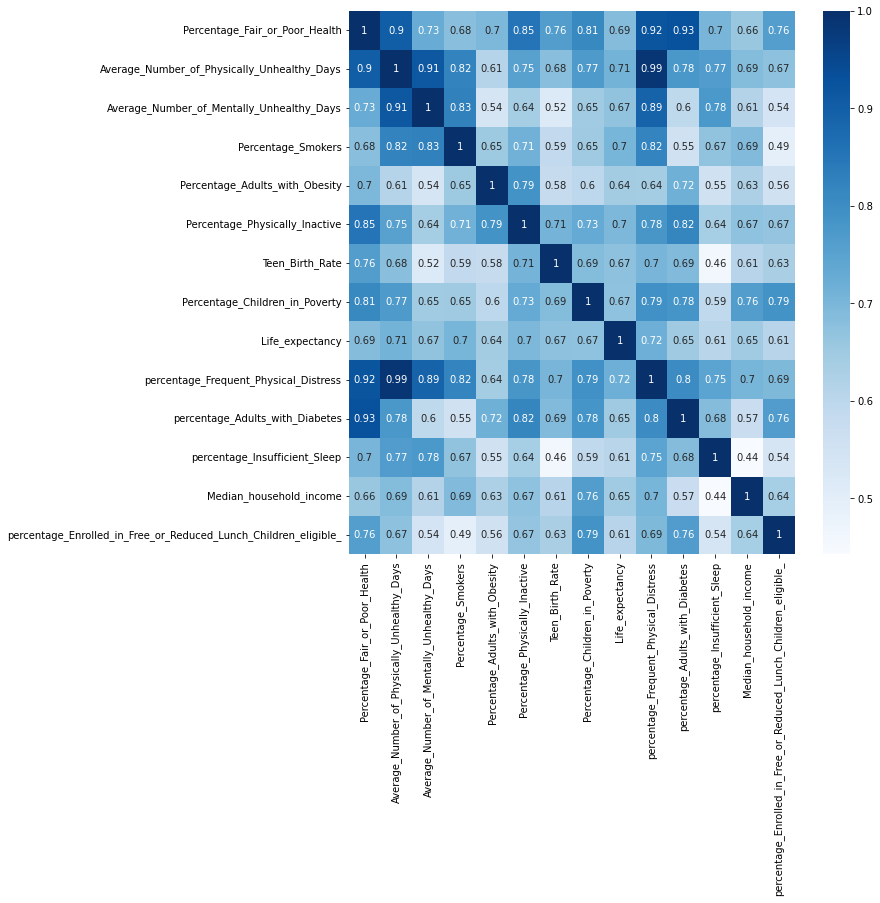

In [16]:
# create a dataframe of features correlated to life expectancy
life_df = health_measures_df[life_corr_cols]
plt.figure(figsize=(10, 10))
sns.heatmap(life_df.corr().abs(), cmap='Blues', annot=True)


In [17]:
# check correlated features in life_df
corr_finder(life_df)

Percentage_Fair_or_Poor_Health   Average_Number_of_Physically_Unhealthy_Days   0.9000455684639014
Percentage_Fair_or_Poor_Health   Percentage_Physically_Inactive   0.8538022388319435
Percentage_Fair_or_Poor_Health   percentage_Frequent_Physical_Distress   0.9194697863856578
Percentage_Fair_or_Poor_Health   percentage_Adults_with_Diabetes   0.9300396078329347
Average_Number_of_Physically_Unhealthy_Days   Average_Number_of_Mentally_Unhealthy_Days   0.9128943203953483
Average_Number_of_Physically_Unhealthy_Days   percentage_Frequent_Physical_Distress   0.9876551726871655
Average_Number_of_Mentally_Unhealthy_Days   percentage_Frequent_Physical_Distress   0.8889465507945684


In [18]:
# remove >.9 correlated features from life_df that are least correlated to life expectancy
rmv_cols = ['Percentage_Fair_or_Poor_Health', 'Average_Number_of_Physically_Unhealthy_Days', 'Average_Number_of_Mentally_Unhealthy_Days']
life_df2 = life_df.drop(rmv_cols, axis=1)

In [19]:
# confirm no correlations above .85
corr_finder(life_df2)

<AxesSubplot:>

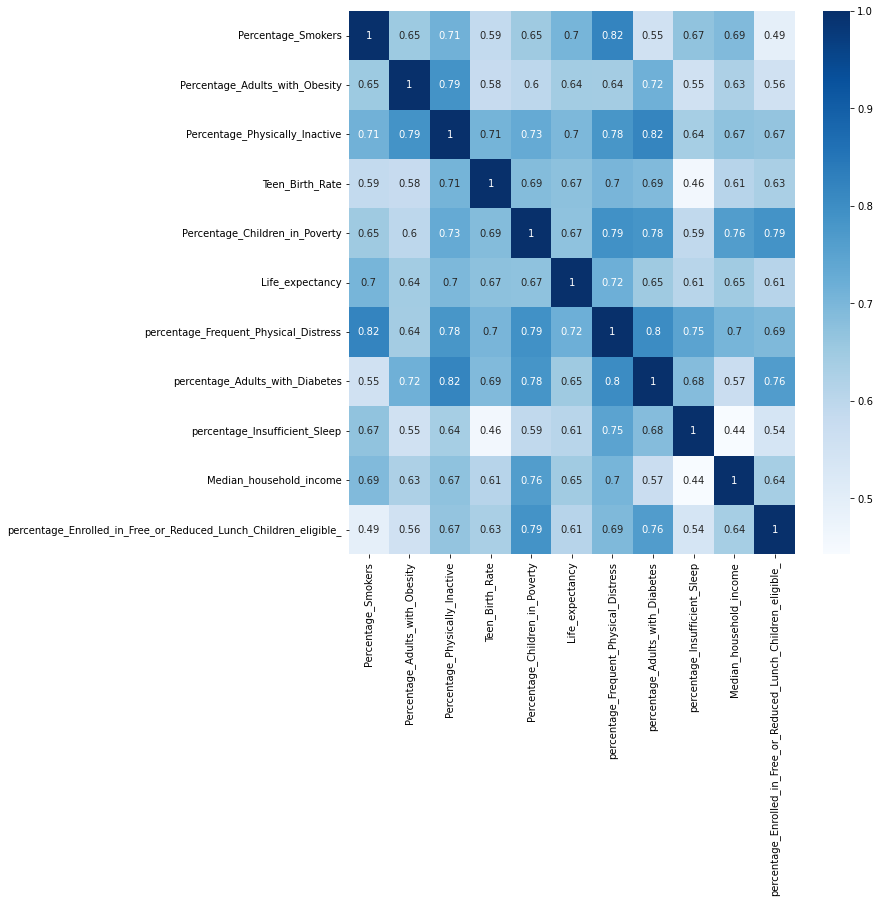

In [20]:
# display the new df corr heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(life_df2.corr().abs(), cmap='Blues', annot=True)

In [21]:
# separate into features and target
y = life_df2['Life_expectancy']
X = life_df2.copy()
X = X.drop('Life_expectancy', axis=1)

In [22]:
# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [23]:
# scale the features
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# instantiate the model
lm = LinearRegression()

In [25]:
# Train the Model
lm.fit(X_train_scaled, y_train)

LinearRegression()

C:\Users\Michael\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

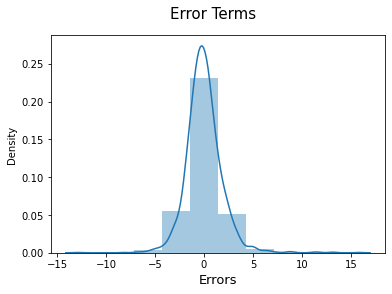

In [26]:
# make predictions for residual analysis
y_train_predict = lm.predict(X_train_scaled)
fig=plt.figure()
sns.distplot((y_train - y_train_predict), bins=10)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('Errors', fontsize=13)


In [27]:
# make predictions with the model
predictions = lm.predict(X_test_scaled)
# create a df of predictions and actual y_test
prediction_df = pd.DataFrame({'Prediction':predictions, 'Actual':y_test}).reset_index(drop=True)
prediction_df


,Prediction,Actual
0,75.715685,72.6
1,79.171611,76.8
2,77.528976,76.7
3,79.045700,78.7
4,78.168651,77.1
...,...,...
780,77.181713,78.2
781,75.750027,78.5
782,76.417754,75.3
783,77.774193,74.6


In [28]:
# print the mean absolute error and r2_score
r2_test = round(r2_score(y_true = y_test, y_pred = predictions),3)
r2_train = round(r2_score(y_true = y_train, y_pred = y_train_predict), 3)
coefficients = lm.coef_
intercept = lm.intercept_
mae = mean_absolute_error(y_test, predictions)
print(f'The train r2 score was {r2_train} and the test r2 score was {r2_test}. Model coefficients:{coefficients} and intercept:{intercept}. MAE:{mae}')

The train r2 score was 0.655 and the test r2 score was 0.638. Model coefficients:[-0.83153856 -0.41005641  0.00118275 -0.83466331 -0.24550492  0.10254589
  0.07235798 -0.45123405  0.24183408 -0.29053836] and intercept:76.90964451190658. MAE:1.2320960378969734


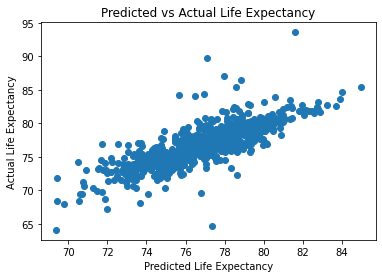

In [29]:
# plot predicted vs actual
x=prediction_df['Prediction']
y=prediction_df['Actual']
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Actual Life Expectancy')
plt.title('Predicted vs Actual Life Expectancy')
plt.scatter(x=x, y=y)

# RFE Exploration

In [30]:
# import dependencies
from numpy import mean, std
from sklearn.model_selection import cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, SelectKBest, f_regression, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


In [31]:
# define dataset
y = health_measures_df['Life_expectancy']
X = health_measures_df.copy()
X = X.drop('Life_expectancy', axis=1)

In [32]:
# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=15)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

In [33]:
#evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=5)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score ='raise')

In [34]:
# report performance
print('MAE:%.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE:-1.674 (0.097)


# Correlation Feature Selection

In [35]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y)
#scale 
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# fit the data
fs.fit(X_train, y_train)
#transform input data
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

Feature 0: 51.264273
Feature 1: 2090.072009
Feature 2: 2318.932411
Feature 3: 1874.462694
Feature 4: 751.774413
Feature 5: 2257.132649
Feature 6: 1688.668044
Feature 7: 770.012572
Feature 8: 2219.382225
Feature 9: 251.494007
Feature 10: 29.955160
Feature 11: 38.945307
Feature 12: 1949.076861
Feature 13: 35.303032
Feature 14: 104.519020
Feature 15: 84.745603
Feature 16: 79.640054
Feature 17: 752.076223
Feature 18: 360.489256
Feature 19: 193.568753
Feature 20: 90.712336
Feature 21: 88.700609
Feature 22: 52.851099
Feature 23: 1893.294035
Feature 24: 1309.748244
Feature 25: 33.614137
Feature 26: 89.369352
Feature 27: 19.234033
Feature 28: 52.407681
Feature 29: 51.078045
Feature 30: 6.591901
Feature 31: 257.954064
Feature 32: 88.033069
Feature 33: 37.900573
Feature 34: 47.198566
Feature 35: 27.809349
Feature 36: 2443.876293
Feature 37: 1698.074806
Feature 38: 33.166649
Feature 39: 42.641034
Feature 40: 25.039095
Feature 41: 41.166790
Feature 42: 39.604633
Feature 43: 1327.801442
Feature 44:

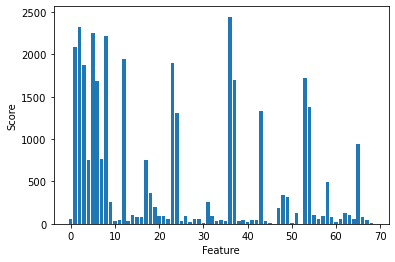

In [37]:
# scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
#plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.show()

# Mutual Information Feature Selection


In [38]:
# configure to select all features
mfs = SelectKBest(score_func=mutual_info_regression, k='all')

In [39]:
# learn relationship from training data
mfs.fit(X_train, y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x00000257250F49D8>)

In [40]:
# transform input data
X_train_mfs = mfs.transform(X_train)
X_test_mfs = mfs.transform(X_test)

Feature 0: 51.264273
Feature 1: 2090.072009
Feature 2: 2318.932411
Feature 3: 1874.462694
Feature 4: 751.774413
Feature 5: 2257.132649
Feature 6: 1688.668044
Feature 7: 770.012572
Feature 8: 2219.382225
Feature 9: 251.494007
Feature 10: 29.955160
Feature 11: 38.945307
Feature 12: 1949.076861
Feature 13: 35.303032
Feature 14: 104.519020
Feature 15: 84.745603
Feature 16: 79.640054
Feature 17: 752.076223
Feature 18: 360.489256
Feature 19: 193.568753
Feature 20: 90.712336
Feature 21: 88.700609
Feature 22: 52.851099
Feature 23: 1893.294035
Feature 24: 1309.748244
Feature 25: 33.614137
Feature 26: 89.369352
Feature 27: 19.234033
Feature 28: 52.407681
Feature 29: 51.078045
Feature 30: 6.591901
Feature 31: 257.954064
Feature 32: 88.033069
Feature 33: 37.900573
Feature 34: 47.198566
Feature 35: 27.809349
Feature 36: 2443.876293
Feature 37: 1698.074806
Feature 38: 33.166649
Feature 39: 42.641034
Feature 40: 25.039095
Feature 41: 41.166790
Feature 42: 39.604633
Feature 43: 1327.801442
Feature 44:

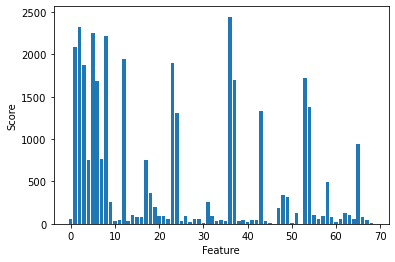

In [41]:
# scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.show()

# Use RFE to determine 15 features


In [42]:
# instantiate and train model
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
# instantiate the rfe
rfe = RFE(lm2, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Premature_death', False, 20),
 ('Percentage_Fair_or_Poor_Health', True, 1),
 ('Average_Number_of_Physically_Unhealthy_Days', True, 1),
 ('Average_Number_of_Mentally_Unhealthy_Days', True, 1),
 ('Percentage_Low_birthweight', True, 1),
 ('Percentage_Smokers', True, 1),
 ('Percentage_Adults_with_Obesity', True, 1),
 ('Food_Environment_Index', True, 1),
 ('Percentage_Physically_Inactive', False, 4),
 ('Percentage_With_Access_to_Exercise_Opportunities', False, 23),
 ('Alcohol_impaired_driving_deaths', False, 26),
 ('Sexually_transmitted_infections_Chlamydia_Cases', False, 43),
 ('Teen_Birth_Rate', True, 1),
 ('Uninsured', False, 34),
 ('Primary_care_physicians', False, 31),
 ('Dentists', False, 25),
 ('Mental_health_providers', False, 48),
 ('Preventable_Hospitalization_Rate', False, 35),
 ('Percentage_With_Annual_Mammogram', True, 1),
 ('Percentage_Vaccinated', False, 11),
 ('High_school_completion', False, 44),
 ('Some_college', False, 41),
 ('Unemployment', False, 47),
 ('Percentage_C

In [43]:
# new cols from 15 features selected above
new_cols = []
for i in list(zip(X_train.columns, rfe.support_, rfe.ranking_)):
    if i[1] == True:
        new_cols.append(i[0])
new_cols

['Percentage_Fair_or_Poor_Health',
 'Average_Number_of_Physically_Unhealthy_Days',
 'Average_Number_of_Mentally_Unhealthy_Days',
 'Percentage_Low_birthweight',
 'Percentage_Smokers',
 'Percentage_Adults_with_Obesity',
 'Food_Environment_Index',
 'Teen_Birth_Rate',
 'Percentage_With_Annual_Mammogram',
 'percentage_Adults_with_Diabetes',
 'Average_Grade_Performance_Math_scores',
 'Segregation_index_School_segregation',
 'Gender_pay_gap',
 'Homicide_Rate',
 'percentage_female']

In [44]:
#create new df from suggested features
life_df3 = health_measures_df[new_cols]

<AxesSubplot:>

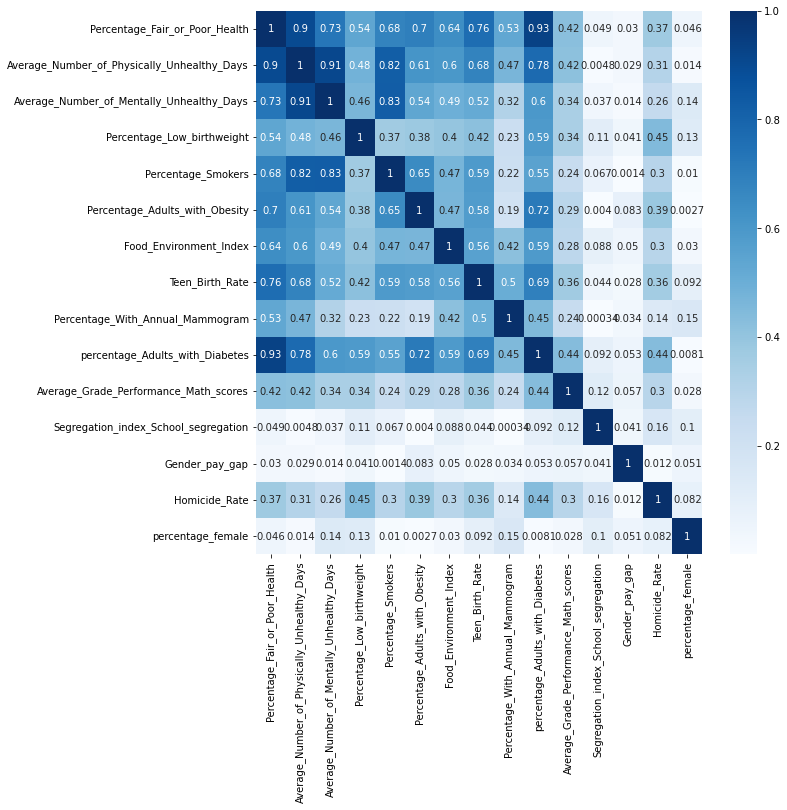

In [45]:
# correlation matrix of new df visualized
plt.figure(figsize=(10,10))
sns.heatmap(life_df3.corr().abs(), cmap='Blues', annot=True)

In [46]:
#define features and target, split into training and testing data, scale features
X = life_df3
y = health_measures_df['Life_expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
X_scaler =scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [47]:
# instantiate the model
lm3 = LinearRegression()
#fit the model
lm3.fit(X_train_scaled, y_train)
# make predictions
predictions = lm3.predict(X_test_scaled)
# make training predictions
y_train_predict = lm3.predict(X_train_scaled)

C:\Users\Michael\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

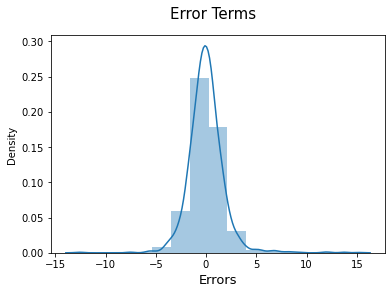

In [48]:
# Residual analysis
# make predictions for residual analysis
fig=plt.figure()
sns.distplot((y_train - y_train_predict), bins=15)
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('Errors', fontsize=13)

In [49]:
# print the mean absolute error and r2_score
r2_test = round(r2_score(y_true = y_test, y_pred = predictions),3)
r2_train = round(r2_score(y_true = y_train, y_pred = y_train_predict), 3)
coefficients = lm.coef_
intercept = lm.intercept_
mae = mean_absolute_error(y_test, predictions)
print(f'The train r2 score was {r2_train} and the test r2 score was {r2_test}. Model coefficients:{coefficients} and intercept:{intercept}. MAE:{mae}')

The train r2 score was 0.678 and the test r2 score was 0.705. Model coefficients:[-0.83153856 -0.41005641  0.00118275 -0.83466331 -0.24550492  0.10254589
  0.07235798 -0.45123405  0.24183408 -0.29053836] and intercept:76.90964451190658. MAE:1.1710692760281833


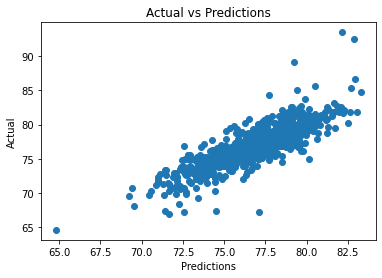

In [50]:
#create a df of predictions and actual values and plot them together
predictions_df = pd.DataFrame({'Predictions': predictions, 'Actual': y_test})
x=predictions_df['Predictions']
y=predictions_df['Actual']
plt.scatter(x=x, y=y)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title('Actual vs Predictions')
plt.show()

In [52]:
# add training predictions to predictions dataframe
train_predictions_df = pd.DataFrame({'Train Predictions': y_train_predict, 'Train Actual': y_train})
prediction_df.to_csv('../Health Rankings Data/Test Model Predictions.csv')
train_predictions_df.to_csv('../Health Rankings Data/Train Model Predictions.csv')